# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
rides_per_type = pyber_data_df.groupby("type")["ride_id"].count()
rides_per_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
drivers_per_type = pyber_data_df.groupby("type")["driver_count"].sum()
drivers_per_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
fares_per_type = pyber_data_df.groupby("type").sum()["fare"]
fares_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_type = fares_per_type / rides_per_type
avg_fare_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = fares_per_type / drivers_per_type
avg_fare_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [25]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides" : rides_per_type,
    "Total Drivers" : drivers_per_type,
    "Total Fares" : fares_per_type,
    "Average Fare per Ride" : avg_fare_type,
    "Average Fare per Driver" : avg_fare_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [21]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [23]:
#  8. Format the columns.
rides_per_type["Total Rides"] = rides_per_type["Total Rides"].map("{:.1f}".format)

KeyError: 'Total Rides'

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
pyber_data_df.tail(10)


fare
type  date                 
Urban 5/7/2019 2:52   36.51
      5/7/2019 5:55    6.89
      5/7/2019 8:47   25.83
      5/8/2019 11:38  19.77
      5/8/2019 13:10  18.04
      5/8/2019 1:54   32.69
      5/8/2019 2:31   41.33
      5/8/2019 4:20   21.99
      5/8/2019 4:39   18.45
      5/8/2019 7:29   18.55

In [12]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()
pyber_data_df.tail(10)

,type,date,fare
2354,Urban,5/7/2019 2:52,36.51
2355,Urban,5/7/2019 5:55,6.89
2356,Urban,5/7/2019 8:47,25.83
2357,Urban,5/8/2019 11:38,19.77
2358,Urban,5/8/2019 13:10,18.04
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45
2363,Urban,5/8/2019 7:29,18.55


In [13]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_data_df_pivot = pyber_data_df.pivot(index='date', columns='type', values='fare')
pyber_data_df_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
5/7/2019 5:55,NaN,NaN,6.89
5/7/2019 7:08,NaN,20.52,NaN
5/7/2019 8:47,NaN,NaN,25.83
5/8/2019 11:38,NaN,NaN,19.77
5/8/2019 13:10,NaN,NaN,18.04
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99
5/8/2019 4:39,NaN,NaN,18.45


In [26]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.
pyber_data_loc = pyber_data_df_pivot.loc["2019-01-01":"2019-04-29"]
pyber_data_loc

type,Rural,Suburban,Urban
date,,,


In [27]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_data_df_pivot.index = pd.to_datetime(pyber_data_df_pivot.index)
pyber_data_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [28]:
# 14. Check that the datatype for the index is datetime using df.info()
pyber_data_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [29]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pyber_data_df_profit = pyber_data_df_pivot.resample("W").sum()
pyber_data_df_profit.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


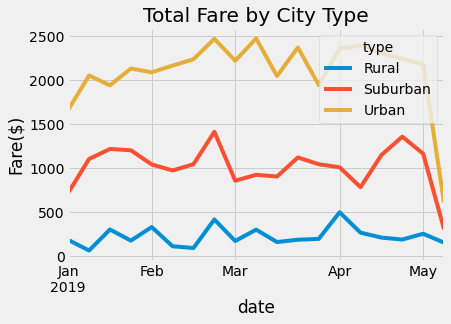

In [39]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
pyber_data_df_profit.plot()
plt.ylabel("Fare($)")
plt.title("Total Fare by City Type")
pyber_data_df_profit.plot

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

